<a href="https://www.kaggle.com/code/aisuko/clustering-ai-topics?scriptVersionId=175066115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install -U -q pyod==1.1.3
!pip install -U -q prince==0.13.0

In [2]:
import pandas as pd

topics = [
    "Agent-based and multi-agent systems",
    "AI applications and innovations",
    "Cognitive modeling and computer-human interaction",
    "Common sense reasoning, search, and constraint satisfaction",
    "Computer vision",
    "Deep learning",
    "Evolutionary computation",
    "Generative Models",
    "Explainable AI",
    "Fairness, Accountability and Transparency",
    "Fuzzy Systems",
    "Game playing and interactive entertainment",
    "Human-Robot Interaction",
    "Information retrieval, integration, and extraction",
    "Knowledge Reasoning and Ontologies",
    "Knowledge representation and reasoning",
    "Machine learning and data mining",
    "Model-based systems",
    "Multidisciplinary AI",
    "Natural language processing",
    "Neural Networks",
    "Planning and scheduling",
    "Robotics",
    "Social choice",
    "Social Robotics",
    "Uncertainty in AI",
    "Web and Information Systems",
    "Trustworthy Large Models"
]

print(len(topics))

df = pd.DataFrame({'Topics': topics})

28


# Basic EDA with KMeans

In [3]:
import copy
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Assuming you have the 'topics' list and 'df' DataFrame from previous responses

# 1. Text Preprocessing and TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Topics'])

# 2. KMeans Clustering (example with 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust n_clusters as needed
cluster_predict=kmeans.fit(tfidf_matrix)

print(cluster_predict)
print(np.unique(cluster_predict))

df_basic=copy.deepcopy(df)
# 3. Add Cluster Labels to DataFrame
df_basic['Cluster'] = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)
[KMeans(n_clusters=5, random_state=42)]


In [4]:
df_basic.head(len(topics))

,Topics,Cluster
0,Agent-based and multi-agent systems,4
1,AI applications and innovations,2
2,Cognitive modeling and computer-human interaction,1
3,"Common sense reasoning, search, and constraint...",3
4,Computer vision,1
5,Deep learning,3
6,Evolutionary computation,3
7,Generative Models,3
8,Explainable AI,2
9,"Fairness, Accountability and Transparency",3


In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

In [6]:
reduced_df = pd.DataFrame({'x': reduced_features[:, 0], 'y': reduced_features[:, 1], 'cluster': df_basic['Cluster']})

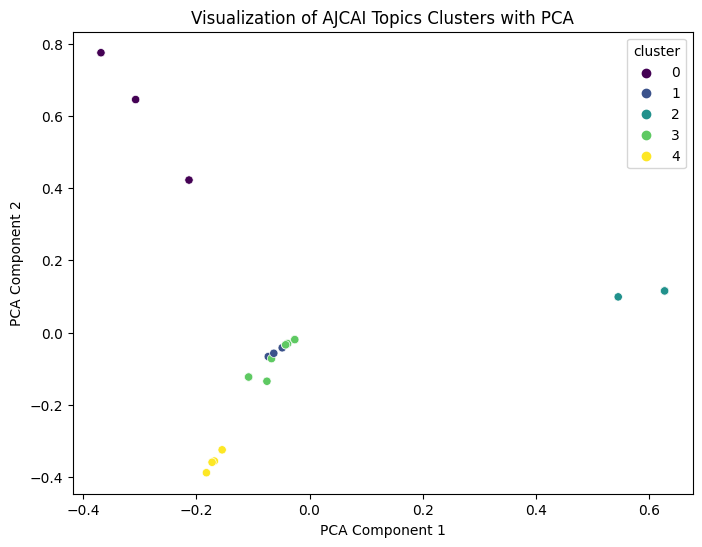

In [7]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', hue='cluster', data=reduced_df, palette='viridis')
plt.title('Visualization of AJCAI Topics Clusters with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Visualization 3D

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# create new binary features(dummy vatriables) for each unique category
# each new feature represents the presence of absence of a specific category
from sklearn.preprocessing import OneHotEncoder

# power_transformer=Pipeline(steps=[("encoder", PowerTransformer())])
onehot_transformer=Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False))]
)


preprocessor=ColumnTransformer(
    transformers=[
        ("onehot_transformer", onehot_transformer,["Topics"])
    ]
)

pipe=Pipeline(steps=[("preprocesor", preprocessor)])

pipe_fit=pipe.fit(df)

data=pd.DataFrame(
    pipe_fit.transform(df),
    columns=pipe_fit.get_feature_names_out().tolist()
)

data.columns.tolist()

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['onehot_transformer__Topics_Agent-based and multi-agent systems',
 'onehot_transformer__Topics_Cognitive modeling and computer-human interaction',
 'onehot_transformer__Topics_Common sense reasoning, search, and constraint satisfaction',
 'onehot_transformer__Topics_Computer vision',
 'onehot_transformer__Topics_Deep learning',
 'onehot_transformer__Topics_Evolutionary computation',
 'onehot_transformer__Topics_Explainable AI',
 'onehot_transformer__Topics_Fairness, Accountability and Transparency',
 'onehot_transformer__Topics_Fuzzy Systems',
 'onehot_transformer__Topics_Game playing and interactive entertainment',
 'onehot_transformer__Topics_Generative Models',
 'onehot_transformer__Topics_Human-Robot Interaction',
 'onehot_transformer__Topics_Information retrieval, integration, and extraction',
 'onehot_transformer__Topics_Knowledge Reasoning and Ontologies',
 'onehot_transformer__Topics_Knowledge representation and reasoning',
 'onehot_transformer__Topics_Machine learning and dat

In [9]:
data.head(len(topics))

,onehot_transformer__Topics_Agent-based and multi-agent systems,onehot_transformer__Topics_Cognitive modeling and computer-human interaction,"onehot_transformer__Topics_Common sense reasoning, search, and constraint satisfaction",onehot_transformer__Topics_Computer vision,onehot_transformer__Topics_Deep learning,onehot_transformer__Topics_Evolutionary computation,onehot_transformer__Topics_Explainable AI,"onehot_transformer__Topics_Fairness, Accountability and Transparency",onehot_transformer__Topics_Fuzzy Systems,onehot_transformer__Topics_Game playing and interactive entertainment,...,onehot_transformer__Topics_Multidisciplinary AI,onehot_transformer__Topics_Natural language processing,onehot_transformer__Topics_Neural Networks,onehot_transformer__Topics_Planning and scheduling,onehot_transformer__Topics_Robotics,onehot_transformer__Topics_Social Robotics,onehot_transformer__Topics_Social choice,onehot_transformer__Topics_Trustworthy Large Models,onehot_transformer__Topics_Uncertainty in AI,onehot_transformer__Topics_Web and Information Systems
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from pyod.models.ecod import ECOD

clf=ECOD()
clf.fit(data)
outliers=clf.predict(data)

data["outliers"]=outliers

# data without outliers
data_no_outliers=data[data["outliers"]==0]
data_no_outliers = data_no_outliers.drop(["outliers"], axis = 1)

# Data with Outliers
data_with_outliers = data.copy()
data_with_outliers = data_with_outliers.drop(["outliers"], axis = 1)

print(data_no_outliers.shape)
print(data_with_outliers.shape)

(28, 27)
(28, 27)


In [11]:
df["outliers"] = outliers
# Original Data with Outliers
df_no_outliers = df[df["outliers"] == 0]
df_no_outliers = df_no_outliers.drop(["outliers"], axis = 1)
print(df_no_outliers.shape)

(28, 1)


# Modeling

One of the disadvanatges of using the Kmeans algorithm is taht we must choose the number of clusters we want to use.

We will use Elbow Method here. It consists of calculating the distorition that exists between the points of a cluster and its centroid. 

/opt/conda/lib/python3.10/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/lib/python3.10/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


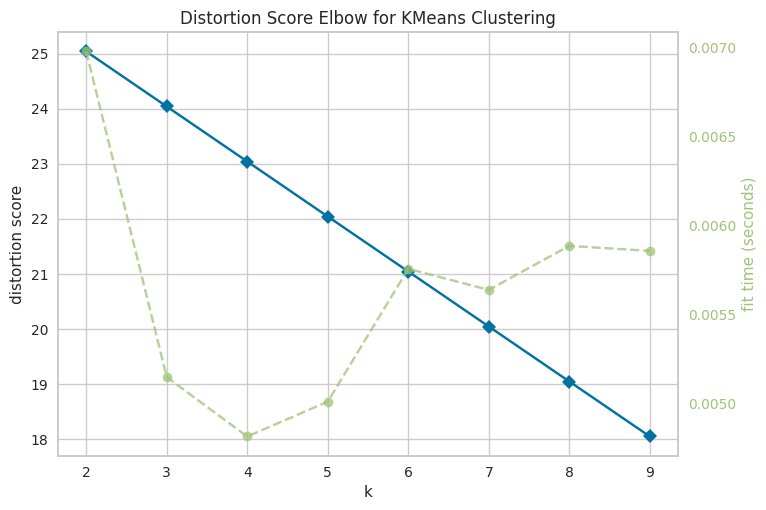

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(data_no_outliers)        # Fit the data to the visualizer
visualizer.show() 

# Optimization

We can perfor Silhoutte visualization to check the optimal number of clusters.

In [13]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

# data visualization
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import numpy as np

def make_Silhouette_plot(X, n_clusters):
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg,
    )
# Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        plt.title(f"The Silhouette Plot for n_cluster = {n_clusters}", fontsize=26)
        plt.xlabel("The silhouette coefficient values", fontsize=24)
        plt.ylabel("Cluster label", fontsize=24)
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.yticks([])  
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    
range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    print(f"N cluster: {n_clusters}")
    make_Silhouette_plot(data_no_outliers, n_clusters)   
    plt.savefig('Silhouette_plot_{}.png'.format(n_clusters))
    plt.close()

N cluster: 2
For n_clusters = 2 The average silhouette_score is : 0.010460472100480409
N cluster: 3
For n_clusters = 3 The average silhouette_score is : 0.010460472100480433
N cluster: 4
For n_clusters = 4 The average silhouette_score is : 0.010460472100480376
N cluster: 5
For n_clusters = 5 The average silhouette_score is : 0.010460472100480307
N cluster: 6
For n_clusters = 6 The average silhouette_score is : 0.01046047210048016
N cluster: 7
For n_clusters = 7 The average silhouette_score is : 0.01046047210048022
N cluster: 8
For n_clusters = 8 The average silhouette_score is : 0.010460472100480242
N cluster: 9
For n_clusters = 9 The average silhouette_score is : 0.010460472100480251


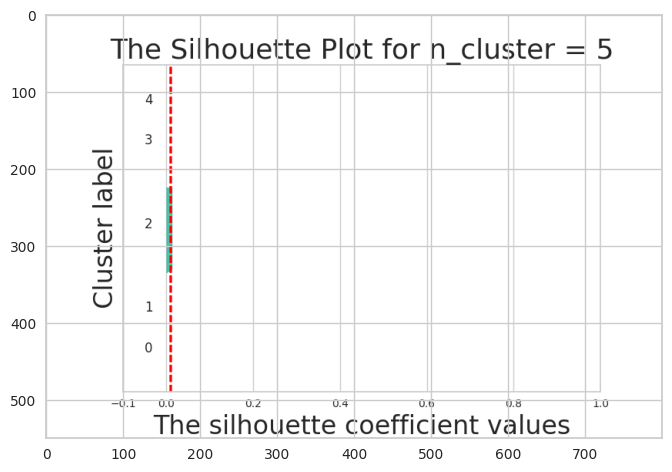

In [14]:
from PIL import Image

img=Image.open('/kaggle/working/Silhouette_plot_5.png').convert('RGB')
img=np.asarray(img)
plt.imshow(np.array(img))

In [15]:
km = KMeans(n_clusters=4,
            init='k-means++', 
            n_init=10,
            max_iter=100, 
            random_state=42)

clusters_predict = km.fit_predict(data_no_outliers)
clusters_predict

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
np.unique(clusters_predict)

array([0, 1, 2, 3], dtype=int32)

# Evaluation

Three ways of evaluating kmeans models is somewhat more open that for other models, like:
* metrics
* visualization
* interpretation

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

"""
The Davies Bouldin index is defined as the average similarity measure of each cluster with its most similat cluster,
where similarity is the ratio of within-clsuter distances to between-cluster distances
"""

print(f"Davies bouldin score: {davies_bouldin_score(data_no_outliers,clusters_predict)}")


"""
Calinski Harabaz Index -> Variance Ratio Criterion.

Calinski Harabaz Index is defined as the ratio of the 
sum of between-cluster dispersion and of within-cluster dispersion.

The higher the index the more separable the clusters.
"""
print(f"Calinski Score: {calinski_harabasz_score(data_no_outliers,clusters_predict)}")


"""
The silhouette score is a metric used to calculate the goodness of 
fit of a clustering algorithm, but can also be used as 
a method for determining an optimal value of k (see here for more).

Its value ranges from -1 to 1.
A value of 0 indicates clusters are overlapping and either
the data or the value of k is incorrect.

1 is the ideal value and indicates that clusters are very 
dense and nicely separated.
"""
print(f"Silhouette Score: {silhouette_score(data_no_outliers,clusters_predict)}")

Davies bouldin score: 0.9299710193119676
Calinski Score: 1.0401785714285716
Silhouette Score: 0.010460472100480376


# Visualization

Here we use the method to reduce dimensionality, PCA. For them we are going to use the Prince libs, focused on exploratory analysis and dimensionality reduction.

In [18]:
# Calculation the principal components in 2D and 3D

import prince
import plotly.express as px

def get_pca_2d(df, predict):

    pca_2d_object = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_2d_object.fit(df)

    df_pca_2d = pca_2d_object.transform(df)
    df_pca_2d.columns = ["comp1", "comp2"]
    df_pca_2d["cluster"] = predict

    return pca_2d_object, df_pca_2d



def get_pca_3d(df, predict):

    pca_3d_object = prince.PCA(
    n_components=3,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_3d_object.fit(df)

    df_pca_3d = pca_3d_object.transform(df)
    df_pca_3d.columns = ["comp1", "comp2", "comp3"]
    df_pca_3d["cluster"] = predict

    return pca_3d_object, df_pca_3d



def plot_pca_3d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()

    fig = px.scatter_3d(df, 
                        x=columns[0], 
                        y=columns[1], 
                        z=columns[2],
                        color='cluster',
                        template="plotly",
                        
                        # symbol = "cluster",
                        
                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 4,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 1000, 
                                height = 800, 
                                autosize = False, 
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            zaxis=dict(title = 'comp3', titlefont_color = 'black')),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))
                      
    
    fig.show()


def plot_pca_2d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()


    fig = px.scatter(df, 
                        x=columns[0], 
                        y=columns[1],
                        color='cluster',
                        template="plotly",
                        # symbol = "cluster",
                        
                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 8,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 800, 
                                height = 700, 
                                autosize = False, 
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            ),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))
                        
        
    fig.show()
    
    
# PCA 3D

pca_3d_object, df_pca_3d = get_pca_3d(data_no_outliers, clusters_predict)
plot_pca_3d(df_pca_3d, title = "PCA Space", opacity=1, width_line = 0.1)
print("The variability is :", pca_3d_object.eigenvalues_summary)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


The variability is :           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              1.037         3.84%                      3.84%
1              1.037         3.84%                      7.68%
2              1.037         3.84%                     11.52%


# PCA 2D

In [19]:
pca_2d_object, df_pca_2d = get_pca_2d(data_no_outliers, clusters_predict)
plot_pca_2d(df_pca_2d, title = "PCA Space", opacity=1, width_line = 0.5)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#  t-SNE

It has a higher computational cost.

In [20]:
from sklearn.manifold import TSNE

sampling_data = data_no_outliers.sample(frac=0.5, replace=True, random_state=1)
sampling_clusters = pd.DataFrame(clusters_predict).sample(frac=0.5, replace=True, random_state=1)[0].values

df_tsne_3d = TSNE(
                  n_components=3, 
                  learning_rate=500, 
                  init='random', 
                  perplexity=5, 
                  n_iter = 5000,
                  n_jobs=-1).fit_transform(sampling_data)

df_tsne_3d = pd.DataFrame(df_tsne_3d, columns=["comp1", "comp2",'comp3'])
df_tsne_3d["cluster"] = sampling_clusters
plot_pca_3d(df_tsne_3d, title = "PCA Space", opacity=1, width_line = 0.1)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

